<a href="https://colab.research.google.com/github/saivenkatreddy29/Pytorch-Learning/blob/main/Replicating_papers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu121
0.20.1+cu121


In [5]:
import matplotlib.pyplot as plt
import torch
from torch import nn
from torchvision import transforms

try:
  from torchinfo import summary
except:
  print('info: couldnt find torch info installing it')
  !pip install torchinfo
  from torchinfo import summary

try:
  from going_modular.going_modular import datasetup,engine
  from helper_functions import download_data,set_seeds, plot_loss_curves
except:
  print('info: couldnt find the helper functions downloading them')
  !git clone https://github.com/mrdbourke/pytorch-deep-learning
  !mv pytorch-deep-learning/going_modular .
  !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
  !rm -rf pytorch-deep-learning
  from going_modular.going_modular import data_setup, engine
  from helper_functions import download_data, set_seeds, plot_loss_curves


info: couldnt find the helper functions downloading them
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4356, done.
remote: Counting objects: 100% (321/321), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 4356 (delta 213), reused 254 (delta 178), pack-reused 4035 (from 1)
Receiving objects: 100% (4356/4356), 654.51 MiB | 23.50 MiB/s, done.
Resolving deltas: 100% (2585/2585), done.
Updating files: 100% (248/248), done.


In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [7]:
image_path = download_data(source = "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination = "pizza_steak_sushi")
image_path

[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


PosixPath('data/pizza_steak_sushi')

In [8]:
train_dir = image_path/'train'
test_dir = image_path/'test'

Create Datasets and DataLoaders

In [10]:
IMAGE_SIZE = 32

manual_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
]
)
print(f'Manually created transforms: {manual_transforms}')

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


Turn images to Dataloaders


In [11]:
BATCH_SIZE = 32

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir = train_dir,
    test_dir = test_dir,
    transform = manual_transforms,
    batch_size = BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7c6f8f5ca620>,
 ['pizza', 'steak', 'sushi'])

Visualize a Single Image

In [12]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [20]:
image_batch, label_batch = next(iter(train_dataloader))
image = image_batch[0]
label = label_batch[0]



In [21]:
print(image.shape)
image = image.permute(1,2,0)
print(image.shape)

torch.Size([3, 224, 224])
torch.Size([224, 224, 3])


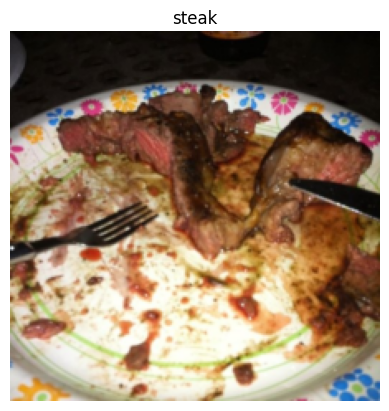

In [22]:
plt.imshow(image)
plt.title(class_names[label])
plt.axis('off');
